In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa_exvivo = pd.read_csv(IPA_dir + 'IPA_Fibroblasts_exvivo.csv', sep = ',')
ipa_exvivo.columns = ['Ingenuity Canonical Pathways','exvivo_minus_log_p_val','exvivo_z_score']
ipa_exvivo

,Ingenuity Canonical Pathways,exvivo_minus_log_p_val,exvivo_z_score
0,Estrogen Receptor Signaling,11.40,-5.196
1,Hepatic Fibrosis Signaling Pathway,10.90,-3.707
2,Cardiac Hypertrophy Signaling (Enhanced),10.90,-7.361
3,Axonal Guidance Signaling,9.46,NaN
4,Pulmonary Fibrosis Idiopathic Signaling Pathway,9.33,-2.014
...,...,...,...
691,T Cell Exhaustion Signaling Pathway,0.00,-0.714
692,Systemic Lupus Erythematosus In T Cell Signali...,0.00,-3.671
693,Systemic Lupus Erythematosus In B Cell Signali...,0.00,-1.179
694,Coronavirus Replication Pathway,0.00,-2.449


In [5]:
## read in vivo regulons
ipa_invivo = pd.read_csv(IPA_dir + 'IPA_Fibroblasts_invivo.csv', sep = ',')
ipa_invivo.columns = ['Ingenuity Canonical Pathways','invivo_minus_log_p_val','invivo_z_score']
ipa_invivo

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score
0,Hepatic Fibrosis Signaling Pathway,12.2,4.951
1,Protein Ubiquitination Pathway,11.9,NaN
2,Pulmonary Fibrosis Idiopathic Signaling Pathway,11.9,6.540
3,Huntington's Disease Signaling,10.8,2.132
4,Protein Kinase A Signaling,10.5,1.376
...,...,...,...
623,SPINK1 Pancreatic Cancer Pathway,0.0,-1.633
624,T Cell Exhaustion Signaling Pathway,0.0,0.943
625,Systemic Lupus Erythematosus In T Cell Signali...,0.0,2.188
626,Systemic Lupus Erythematosus In B Cell Signali...,0.0,3.960


In [6]:
ipa = pd.merge(ipa_invivo, ipa_exvivo, on='Ingenuity Canonical Pathways')
ipa

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
0,Hepatic Fibrosis Signaling Pathway,12.2,4.951,10.90,-3.707
1,Protein Ubiquitination Pathway,11.9,NaN,2.05,NaN
2,Pulmonary Fibrosis Idiopathic Signaling Pathway,11.9,6.540,9.33,-2.014
3,Huntington's Disease Signaling,10.8,2.132,2.61,-1.697
4,Protein Kinase A Signaling,10.5,1.376,4.50,-2.091
...,...,...,...,...,...
612,SPINK1 Pancreatic Cancer Pathway,0.0,-1.633,0.00,3.162
613,T Cell Exhaustion Signaling Pathway,0.0,0.943,0.00,-0.714
614,Systemic Lupus Erythematosus In T Cell Signali...,0.0,2.188,0.00,-3.671
615,Systemic Lupus Erythematosus In B Cell Signali...,0.0,3.960,0.00,-1.179


In [10]:
ipa_diverging_2 = ipa[(ipa['invivo_z_score'] > +1) & (ipa['exvivo_z_score'] < -1)]
ipa_diverging_2.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
0,Hepatic Fibrosis Signaling Pathway,12.20,4.951,10.900,-3.707
2,Pulmonary Fibrosis Idiopathic Signaling Pathway,11.90,6.540,9.330,-2.014
3,Huntington's Disease Signaling,10.80,2.132,2.610,-1.697
4,Protein Kinase A Signaling,10.50,1.376,4.500,-2.091
6,Estrogen Receptor Signaling,9.46,5.288,11.400,-5.196
9,ILK Signaling,9.23,3.606,4.180,-2.092
11,Signaling by Rho Family GTPases,9.07,6.490,2.940,-4.041
12,Remodeling of Epithelial Adherens Junctions,8.85,2.333,0.000,-1.342
14,Oxytocin Signaling Pathway,8.49,3.916,5.280,-4.536
15,Hypoxia Signaling in the Cardiovascular System,8.17,1.732,0.666,-1.508


In [9]:
ipa_diverging_1 = ipa[(ipa['invivo_z_score'] < -1) & (ipa['exvivo_z_score'] > +1)]
ipa_diverging_1.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
79,RHOGDI Signaling,4.27,-4.867,1.160,2.598
108,PPAR Signaling,3.73,-2.746,4.820,1.043
166,Antioxidant Action of Vitamin C,2.68,-2.524,0.818,1.177
181,PTEN Signaling,2.52,-1.177,5.940,2.774
200,HIPPO signaling,2.26,-1.667,3.410,2.837
244,VDR/RXR Activation,1.67,-2.333,2.280,1.147
303,Role of p14/p19ARF in Tumor Suppression,1.13,-1.342,0.772,1.265
612,SPINK1 Pancreatic Cancer Pathway,0.00,-1.633,0.000,3.162


In [11]:
pathways = ['RHOGDI Signaling','PPAR Signaling','PTEN Signaling', 'HIPPO signaling', 'SPINK1 Pancreatic Cancer Pathway',
            'Protein Kinase A Signaling', 'Estrogen Receptor Signaling', 'ILK Signaling', 'HIF1α Signaling', 'Oxytocin Signaling Pathway'
]

In [14]:
ipa = ipa[ipa['Ingenuity Canonical Pathways'].isin(pathways)]

In [16]:
diverging_invivo = ipa[['Ingenuity Canonical Pathways','invivo_z_score']]
diverging_invivo = diverging_invivo.sort_values(by = 'invivo_z_score', ascending = False)
diverging_invivo.rename(columns = {'invivo_z_score':'z-score'}, inplace = True)
diverging_invivo['condition'] = 'invivo'
diverging_exvivo = ipa[['Ingenuity Canonical Pathways','exvivo_z_score']]
diverging_exvivo.rename(columns = {'exvivo_z_score':'z-score'}, inplace = True)
diverging_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_290018/1890095800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverging_exvivo['condition'] = 'exvivo'


In [17]:
diverging_induced = pd.concat([diverging_invivo, diverging_exvivo], axis=0)

In [18]:
diverging_induced

,Ingenuity Canonical Pathways,z-score,condition
6,Estrogen Receptor Signaling,5.288,invivo
14,Oxytocin Signaling Pathway,3.916,invivo
9,ILK Signaling,3.606,invivo
16,HIF1α Signaling,1.722,invivo
4,Protein Kinase A Signaling,1.376,invivo
181,PTEN Signaling,-1.177,invivo
612,SPINK1 Pancreatic Cancer Pathway,-1.633,invivo
200,HIPPO signaling,-1.667,invivo
108,PPAR Signaling,-2.746,invivo
79,RHOGDI Signaling,-4.867,invivo


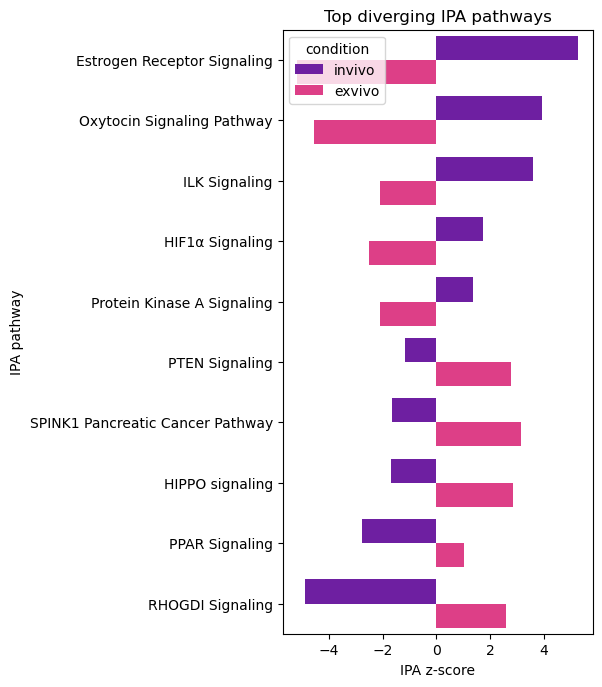

In [21]:
sb.barplot(data = diverging_induced,
           x = 'z-score',
           y = 'Ingenuity Canonical Pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top diverging IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                #xlim = (-1.5,2)
               )
plt.savefig(fig_dir + 'barplot_Fibroblasts_IPA_diverging_pathways.pdf')
plt.show()